<a href="https://colab.research.google.com/github/reetam021-pixel/Algorithmic-Trading---Finance-and-Analytics-Club-Winter-Project-2025-26/blob/patch-2/Assignment%203/250576_KumarReetam/250576_KumarReetam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1:
1.

/tmp/ipython-input-581028523.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('RELIANCE.NS', period='2y')
[*********************100%***********************]  1 of 1 completed


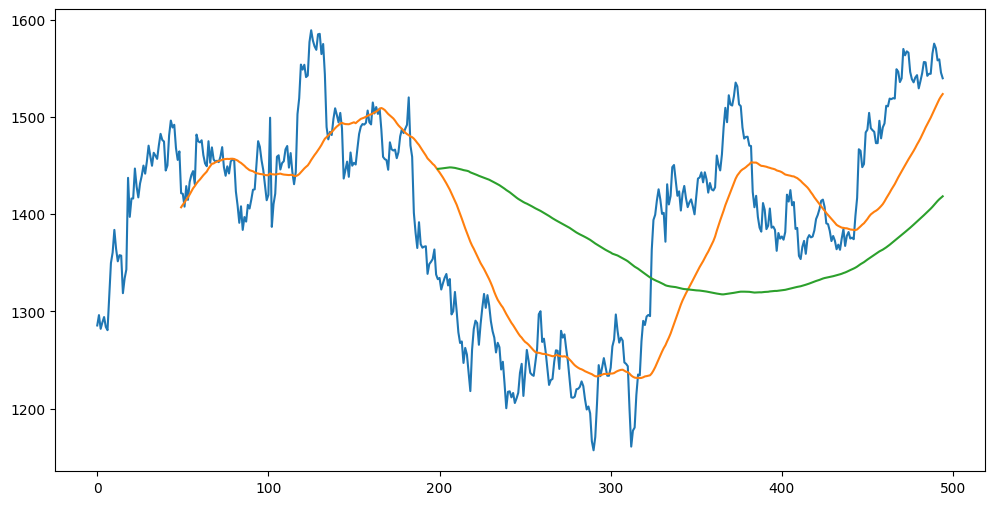

In [24]:
df = yf.download('RELIANCE.NS', period='2y')
df.reset_index(inplace=True)

plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(df['Close'].rolling(50).mean())
plt.plot(df['Close'].rolling(200).mean())
plt.show()

2.

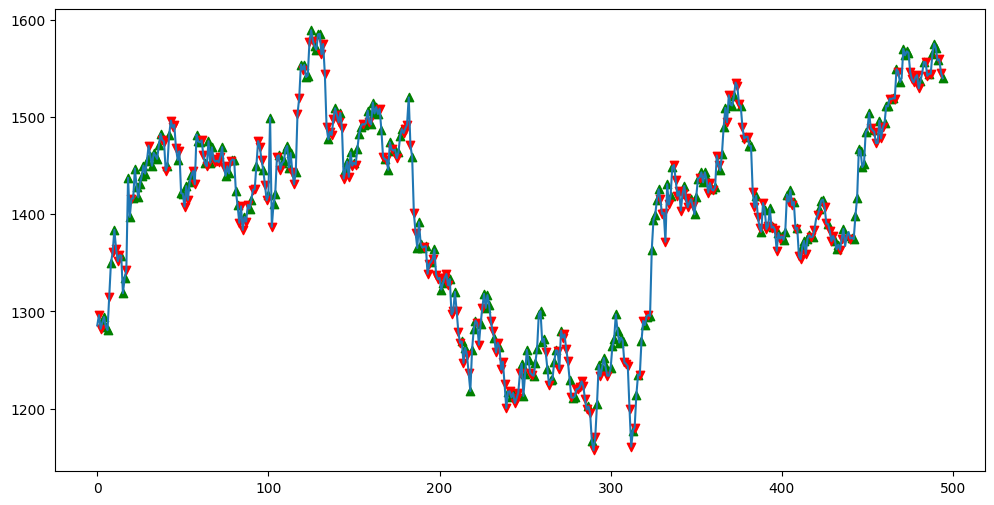

In [25]:
df['Gap'] = df['Open'] - df['Close'].shift()

def signs(df):
  signs = []

  for i in range(len(df)):
    if df['Gap'].iloc[i]:
      if (df['Gap'].iloc[i] > 0):
        signs.append(1)

      elif (df['Gap'].iloc[i] < 0):
        signs.append(-1)

      else:
        signs.append(0)

    else:
      signs.append(0)
  return signs

df['Sign'] = signs(df)

gap_up_df = df[df['Sign'] == 1]
gap_down_df = df[df['Sign'] == -1]
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.scatter(gap_up_df.index,gap_up_df['Close'],marker='^',color='green')
plt.scatter(gap_down_df.index,gap_down_df['Close'],marker='v',color='red')
plt.show()

3.

/tmp/ipython-input-3821766074.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('RELIANCE.NS', period='1d', interval='1m')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


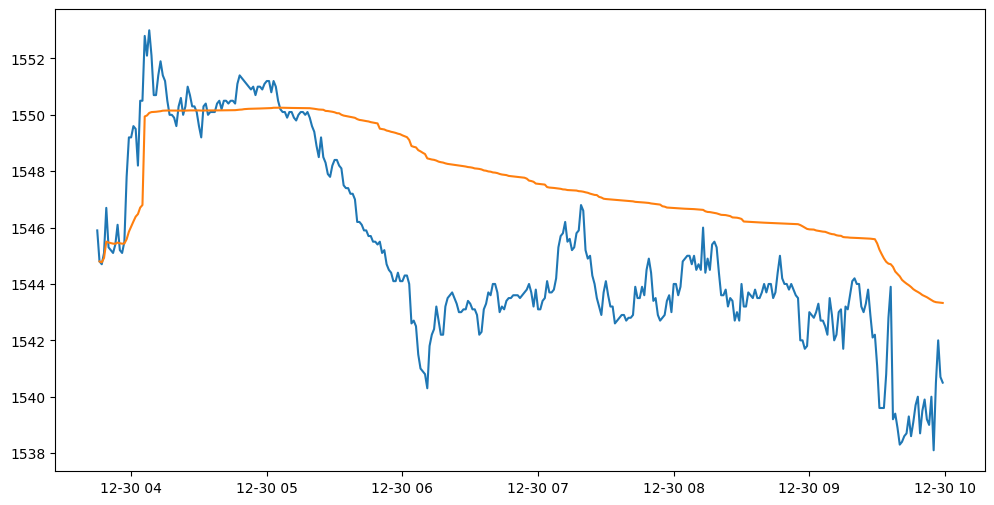

In [26]:
df = yf.download('RELIANCE.NS', period='1d', interval='1m')

def vwap(df):
  vwap = []
  n = d = 0
  for i in range(len(df)):
    n += df['Close'].iloc[i] * df['Volume'].iloc[i]
    d += df['Volume'].iloc[i]
    vwap.append(n / d)
  return vwap

df['VWAP'] = vwap(df)

plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(df['VWAP'])
plt.show()

# Part 2:

In [27]:
df = yf.download('TCS.NS', start='2023-01-01', end='2024-01-01', multi_level_index=False)

/tmp/ipython-input-367142433.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TCS.NS', start='2023-01-01', end='2024-01-01', multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


1.

In [28]:
def bollinger_bands(df, period, nsd):
  df['sma'] = df['Close'].rolling(period).mean()
  df['sd'] = df['Close'].rolling(period).std()
  df['upper'] = df['sma'] + nsd * df['sd']
  df['lower'] = df['sma'] - nsd * df['sd']
  return df

def rsi(df,period):
  df['diff'] = df['Close'].diff()
  df['Gain'] = (np.where(df['diff'] < 0, 0, df['diff']))
  df['Loss'] = abs(np.where(df['diff'] > 0, 0 , df['diff']))
  df['avg_gain'] = df['Gain'].rolling(period).mean()
  df['avg_loss'] = df['Loss'].rolling(period).mean()
  df['RS'] = df['avg_gain']/df['avg_loss']
  df['RSI'] = 100 - (100/(1+df['RS']))
  return df

def macd(df,short_period,long_period,p):
  df['long_ema'] = df['Close'].ewm(span=long_period,adjust=False).mean()
  df['short_ema'] = df['Close'].ewm(span=short_period,adjust=False).mean()
  df['MACD'] = df['short_ema'] - df['long_ema']
  df['signal_line'] = df['MACD'].ewm(span=p,adjust=False).mean()
  df['macd_signal'] = df['signal_line'] - df['MACD']
  return df

def adx(df, period):
  df['+DM'] = df['High'].diff()
  df['-DM'] = -df['Low'].diff()
  df['-DM'] = np.where(df['+DM'] > df['-DM'], 0, df['-DM']) # removed ( ) & (df['-DM'] > 0) coz https://www.investopedia.com/terms/d/dmi.asp didn't mention so
  df['+DM'] = np.where(df['-DM'] > df['+DM'], 0, df['+DM']) # similarly removed ( ) & (df['+DM'] > 0) for the same reason
  df['true_range'] = np.maximum(df['High'] - df['Low'], abs(df['High'] - df['Close'].shift()), abs(df['Low'] - df['Close'].shift()))
  df['smoothed_+DM'] = df['+DM'].rolling(period).mean()
  df['smoothed_-DM'] = df['-DM'].rolling(period).mean()
  df['ATR'] = df['true_range'].rolling(period).mean()
  df['+DI'] = df['smoothed_+DM'] / df['ATR'] * 100
  df['-DI'] = df['smoothed_-DM'] / df['ATR'] * 100
  df['DX'] = abs(df['+DI'] - df['-DI']) / abs(df['+DI'] + df['-DI']) * 100
  df['ADX'] = df['DX'].rolling(period).mean()
  return df

def so(df, period):
  df['%K'] = (df['Close'] - df['Low'].shift().rolling(period).min()) / (df['High'].shift().rolling(period).max() - df['Low'].shift().rolling(period).min()) * 100
  df['%D'] = df['%K'].rolling(3).mean()
  return df

def atr(df, period):
  df['true_range'] = np.maximum(df['High'] - df['Low'], abs(df['High'] - df['Close'].shift()), abs(df['Low'] - df['Close'].shift()))
  df['ATR'] = df['true_range'].rolling(period).mean()
  return df

2.

In [29]:
def bollinger_bands_signals(df):
  df = bollinger_bands(df, 20, 2)
  bollinger_bands_signals = []
  for i in range(len(df)):
    if df['Close'].iloc[i] < df['lower'].iloc[i]:
      bollinger_bands_signals.append(1)
    elif df['Close'].iloc[i] > df['upper'].iloc[i]:
      bollinger_bands_signals.append(-1)
    else:
      bollinger_bands_signals.append(0)
  return bollinger_bands_signals

def rsi_signals(df, oversold_threshold, overbought_threshold):
  df = rsi(df, 14)
  rsi_signals = []
  for i in range(len(df)):
    if df['RSI'].iloc[i] < oversold_threshold:
      rsi_signals.append(1)
    elif df['RSI'].iloc[i] > overbought_threshold:
      rsi_signals.append(-1)
    else:
      rsi_signals.append(0)
  return rsi_signals

def macd_signals(df):
  df = macd(df, 12, 26, 9)
  macd_signals = []
  for i in range(len(df)):
    if df['macd_signal'].iloc[i]:
      if (df['macd_signal'].iloc[i] > 0):
        macd_signals.append(1)
      elif (df['macd_signal'].iloc[i] < 0):
        macd_signals.append(-1)
      else:
        macd_signals.append(0)
    else:
      macd_signals.append(0)
  return macd_signals

def adx_signals(df, uptrend_threshold, downtrend_threshold):
  df = adx(df, 14)
  adx_signals = []
  for i in range(len(df)):
    if df['+DI'].iloc[i] > df['-DI'].iloc[i] and df['ADX'].iloc[i] > uptrend_threshold:
      adx_signals.append(1)
    elif df['-DI'].iloc[i] > df['+DI'].iloc[i] and df['ADX'].iloc[i] > downtrend_threshold:
      adx_signals.append(-1)
    else:
      adx_signals.append(0)
  return adx_signals

def so_signals(df, oversold_threshold, overbought_threshold):
  df = so(df, 14)
  so_signals = []
  for i in range(len(df)):
    if df['%K'].iloc[i] < oversold_threshold and df['%K'].iloc[i] > df['%D'].iloc[i]:
      so_signals.append(1)
    elif df['%K'].iloc[i] > overbought_threshold and df['%K'].iloc[i] < df['%D'].iloc[i]:
      so_signals.append(-1)
    else:
      so_signals.append(0)
  return so_signals

def atr_signals(df):
  df = atr(df, 14)
  # ATR cannot be used to generate buy/sell signals on its own, but only with other technical indicators. An example with ADX is shown above.

df['bollinger_bands_signal'] = bollinger_bands_signals(df)
df['rsi_signal'] = rsi_signals(df, 30, 70)
df['macd_signal'] = macd_signals(df)
df['adx_signal'] = adx_signals(df, 25, 25)
df['so_signal'] = so_signals(df, 20, 80)

final = pd.DataFrame({'Indicator': ['Bollinger Bands', 'Relative Strength Index (RSI)', 'MACD', 'Average Directional Index (ADX)', 'Stochastic Oscillator (SO)'],
                      'Total number of buy signals': [df['bollinger_bands_signal'].value_counts().get(1),
                                                      df['rsi_signal'].value_counts().get(1),
                                                      df['macd_signal'].value_counts().get(1),
                                                      df['adx_signal'].value_counts().get(1),
                                                      df['so_signal'].value_counts().get(1),
                                                     ],
                      'Total number of sell signals': [df['bollinger_bands_signal'].value_counts().get(-1),
                                                       df['rsi_signal'].value_counts().get(-1),
                                                       df['macd_signal'].value_counts().get(-1),
                                                       df['adx_signal'].value_counts().get(-1),
                                                       df['so_signal'].value_counts().get(-1),
                                                      ]
                     }).set_index('Indicator')

final

,Total number of buy signals,Total number of sell signals
Indicator,,
Bollinger Bands,6,14
Relative Strength Index (RSI),22,40
MACD,106,138
Average Directional Index (ADX),106,63
Stochastic Oscillator (SO),16,27
